In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data = np.genfromtxt("bloodtest_data.txt")
x = data[:, 0]/24
y = data[:, 1]

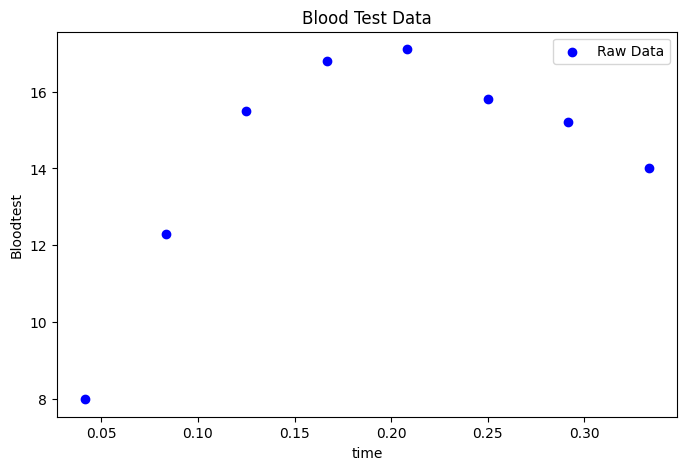

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='blue', label='Raw Data')
plt.xlabel('time')
plt.ylabel('Bloodtest')
plt.title('Blood Test Data')
plt.legend()
plt.show()

In [41]:
t = x
z = np.log(y) - np.log(x)

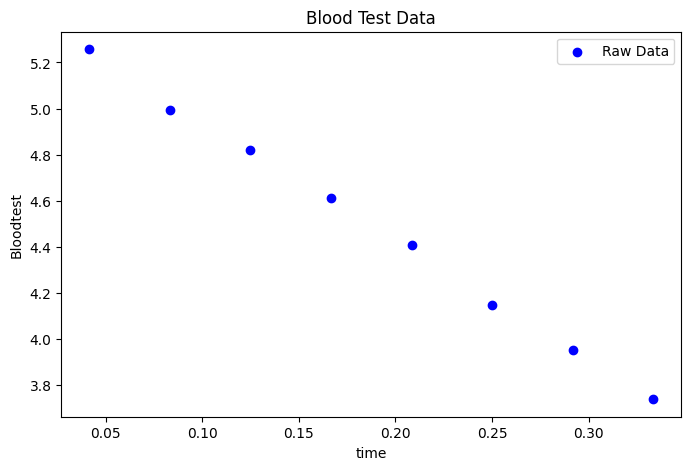

In [42]:
plt.figure(figsize=(8,5))
plt.scatter(t, z, color='blue', label='Raw Data')
plt.xlabel('time')
plt.ylabel('Bloodtest')
plt.title('Blood Test Data')
plt.legend()
plt.show()

In [43]:
def simple_least_squares(x, y):
    N = len(x)
    assert N == len(y), "Input arrays must have the same length"
    # Model: y = c1 + c2 * t
    M = 2  # Number of parameters
    A = np.zeros((N, M))
    for i in range(N):
        A[i, 0] = 1.0
        A[i, 1] = t[i]
    b = z

    # Normal equation
    B = np.matmul(A.T, A)
    Y = np.matmul(A.T, b)
    params = np.linalg.solve(B, Y)
    return params

In [44]:
params = simple_least_squares(t, z)
params

array([ 5.45943162, -5.16328287])

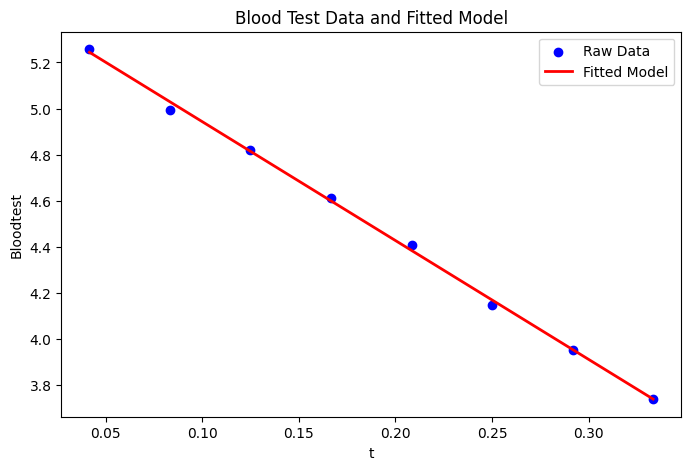

In [45]:
# Generate fitted values
y_fit = params[0] + params[1]*t
plt.figure(figsize=(8,5))
plt.scatter(t, z, color='blue', label='Raw Data')
plt.plot(t, y_fit, color='red', label='Fitted Model', linewidth=2)
plt.xlabel('t')
plt.ylabel('Bloodtest')
plt.title('Blood Test Data and Fitted Model')
plt.legend()
plt.show()

In [46]:
k = params[0]
c1 = np.exp(k)
c2 = params[1]

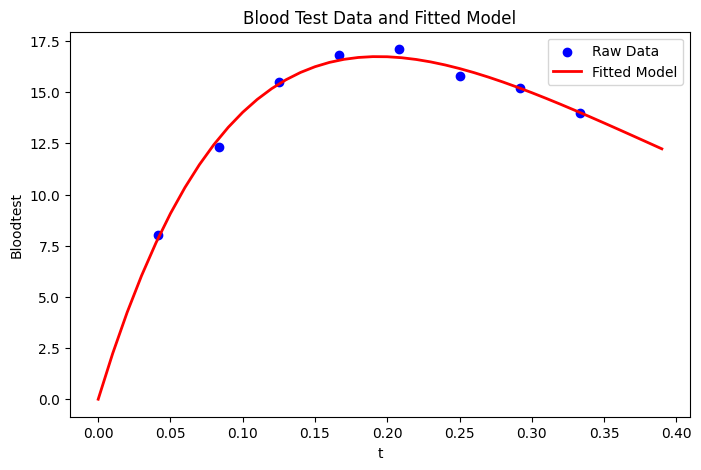

In [49]:
# Generate fitted values
def y_fit(x,c1,c2):
    return c1 * x * np.exp(c2 * x)

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='blue', label='Raw Data')

t = np.arange(0, 0.4, 0.01)
plt.plot(t, y_fit(t, c1, c2), color='red', label='Fitted Model', linewidth=2)
plt.xlabel('t')
plt.ylabel('Bloodtest')
plt.title('Blood Test Data and Fitted Model')
plt.legend()
plt.show()